# Starting simple, one variable, 4 agents - all functions tested along the way

## Testing get_subgradient()

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get_subgradient(f, x, delta= 1e-2):

    """
    Parameters
    -----------
    f: function
        An arbitrary function.
    x: array-like
        An array with the (multi-dimensional) point for which the subgradient of f is desired.
    delta: float
        Represents an infinitesimally small step along an axis.
    
    Returns
    -------

    numpy array: shape (len(x),)
         Gradient vector of f at point x.
            Contains the partial derivatives of f with respect to x_1, ..., x_n.    
    """

    if type(x[0]) is not float:
        x = [float(x_i) for x_i in x]

    # Depricated------------------ -> try putting a "-" in front of g at step 2 of the optimization process

    Df = np.zeros((len(x), 1), dtype=int)    # list with the partial deriatives of f w.r.t. x_1, ..., x_n

    for i in range(len(x)):

        x_aux = np.copy(x)
        
        x_aux[i] = x[i] + delta

        Df[i] = (f(x_aux)-f(x)) / delta          # Get this to work, then get back!
    
    return Df


In [3]:
f = lambda x: x[0]**2 + 3*x[0]     # argmin_x f = -3/2

optimal_point = np.array( [-3/2] )        # f should have gradient 0 at this point

random_point = np.array( [6] )      # f should have gradient 15 at this point

print("gradient at point: ", get_subgradient(f= f, x= optimal_point)) # i expect sth very close to 0
print("gradient at point: ", get_subgradient(f= f, x= random_point)) # i expect sth very close to 0

gradient at point:  [[0]]
gradient at point:  [[15]]


Text(0, 0.5, 'f(x)')

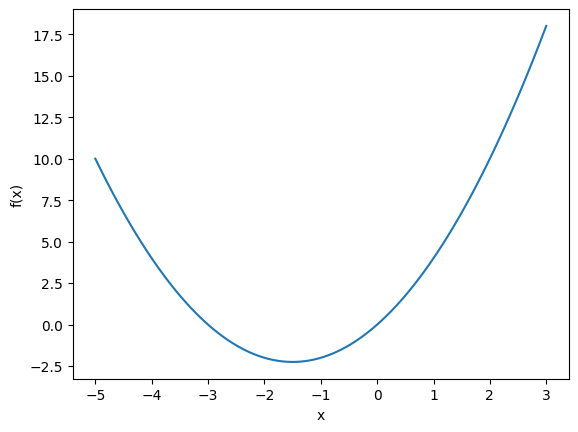

In [4]:

xs = np.linspace(-5, 3, num= 100)
plt.plot(xs, [f([x]) for x in xs])
plt.xlabel("x")
plt.ylabel("f(x)")

## get_subgradient() works

/tmp/ipykernel_6428/3964758507.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = [float(x_i) for x_i in x]


history_f:  [0, array(-0.00089991), array(-0.00179964), array(-0.00269919), array(-0.00359856), array(-0.00449775), array(-0.00539676), array(-0.00629559), array(-0.00719424), array(-0.00809271), array(-0.008991), array(-0.00988911), array(-0.01078704), array(-0.01168479), array(-0.01258236), array(-0.01347975), array(-0.01437696), array(-0.01527399), array(-0.01587191), array(-0.01646975), array(-0.01706751), array(-0.01766519), array(-0.01826279), array(-0.01886031), array(-0.01945775), array(-0.02005511), array(-0.02065239), array(-0.02124959), array(-0.02184671), array(-0.02244375), array(-0.02304071), array(-0.02363759), array(-0.02423439), array(-0.02483111), array(-0.02542775), array(-0.02602431), array(-0.02662079), array(-0.02721719), array(-0.02781351), array(-0.02840975), array(-0.02900591), array(-0.02960199), array(-0.03019799), array(-0.03079391), array(-0.03138975), array(-0.03198551), array(-0.03258119), array(-0.03317679), array(-0.03377231), array(-0.03436775), array(

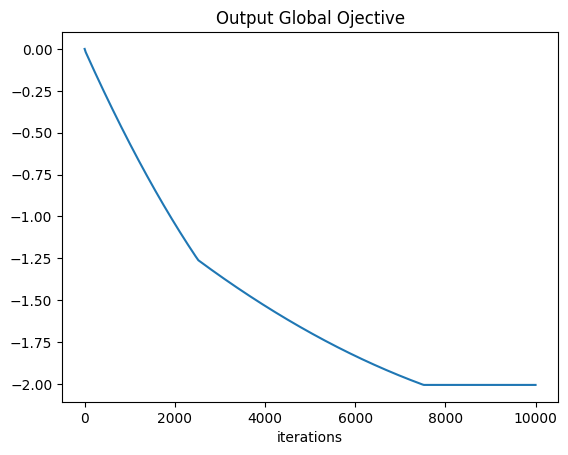

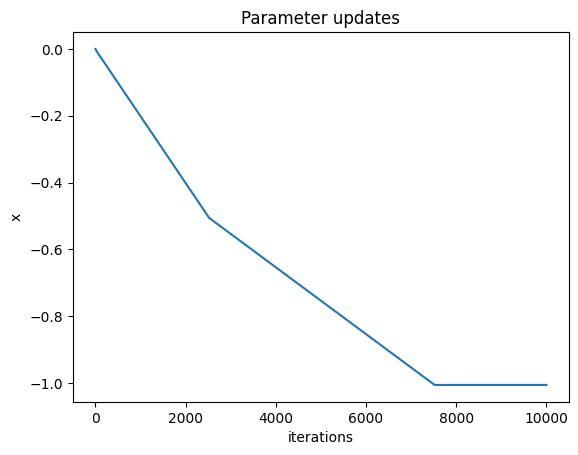

In [5]:
n_iterations = 10000
learning_rate = 0.0001

import matplotlib.pyplot as plt

history_f = []
history_x = []

x = np.array([0])    # x initial = 0, I expect it to converge on -1/5


for _ in range(n_iterations):
    history_f.append(np.squeeze(f(x)))
    history_x.append(np.squeeze(x))

    x = x - learning_rate * get_subgradient(f, x)

print("history_f: ", history_f)
print("history_x: ", history_x)
print("final x = ", x)

plt.plot(range(len(history_f)), history_f)
plt.title("Output Global Ojective")
plt.xlabel("iterations")

plt.show()

plt.title("Parameter updates")
plt.xlabel("iterations")
plt.ylabel("x")
plt.plot(range(len(history_x)), history_x )

# Moving to DO 

## Problem statement

We have a network of 4 agents that each have an objective function $f_i(x)$. 

The **goal** is to optimize the global objective function:

$$\begin{array}{rc}\operatorname{minimize} & \sum_{i=1}^m f_i(x) \\ \text { subject to } & x \in \mathbb{R}^n,\end{array} \quad \quad
(1)$$

Each private objective $f_i$ is defined below

In [6]:
def f_global(x, fs_private):    # global objective function
    """    
    Returns
    -------
    output: float
        The output of our global objective function for the current state of the agents.
            The goal is to make this output as low as possible (see eq. 1).
    
    """


    private_outputs = [ f_i(x_i) for f_i, x_i in zip(fs_private, x) ]

    # print("Private Outputs:",  private_outputs)

    global_output = sum(private_outputs)

    return global_output


### Private Objectives $f_1, ..., f_4$
Convex quadratic functions of the form: $f_i(x) = x^TP_ix+b_ix+c$

In [7]:
N_AGENTS = 4          # the number of agents
N_PARAMS = 2       # the number of parameters of each private objective function

P = np.array(
    [ [[0.2, 0.1],
       [0.1, 0.2]],

      [[0.4, 0.1],
       [0.2, 0.4]],

      [[0.3, 0.1],
       [0.1, 0.2]],


      [[0.5, 0.1],
       [0.1, 0.2]],   
         ]
)

b = np.array(
    [ [[1],
       [8]],

      [[1],
       [1]],

      [[3],
       [1]],

      [[5],
       [1]],   
       ]
)
c = np.linspace(start= 0, stop= 1, num= N_AGENTS)      # c_i are chosen uniformly from [0, 1]

## Optimization Process

Optimizing the parameters of the agents using eq. 6:

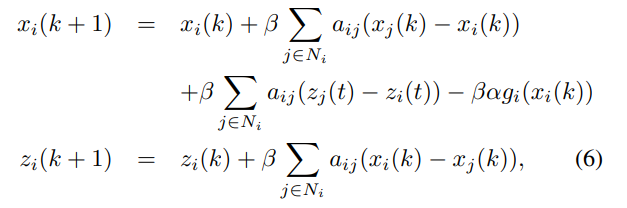

$x_i(k+1) = x_i(k)+$

- $\beta\sum\limits_{j\in N_i}a_{ij}(x_j(k)-x_i(k))$
    - Consensus step - agent i's parameters get closer to its neighbors
        - how far are agent $i$'s parameters from its neighbours's ($j$) parameters
        - for each neighbor, the consensus eror is weighted by $a_{ij}$  
- $\beta\sum\limits_{j\in N_i}a_{ij}(z_j(k)-z_i(k))$ 
    - Memory consensus error - how far is an agent's
- $-\beta\alpha g_i(x_i(k))$
    - (gradient descent) step in the direction of steepest descent on $f_i$ from point $x_i$
        - $\alpha$ - step magnitude (learning rate in gradient descent)
        - $g_i(x_i(k))$ - subgradient of $f_i$ at point $x_i(k)$



$z_i(k+1) = z_i(k)+$
- $\beta\sum\limits_{j\in N_i}a_{ij}(x_i(k)-x_j(k))$





### 2 computation steps
- first, compute auxiliary states of the agents **$z_i$**
- second, update the agents's parameters **$x_i$**

#### Hyperparameters and `get_subgradient()`

In [8]:
def get_subgradient(f, x, delta= 1e-2):

    """
    Parameters
    -----------
    f: function
        An arbitrary function.
    x: array-like

        An array with the (multi-dimensional) point for which the subgradient of f is desired.
        Eleets of x MUT be floats
    delta: float
        Represents an infinitesimally small step along an axis.
    
    Returns
    -------
    float: value of the subgradient (directional derivative) of f at point x.             
    """
         

    Df = np.zeros((len(x), 1), dtype=int)    # list with the partial deriatives of f w.r.t. x_1, ..., x_n

    for i in range(len(x)):

        x_aux = np.copy(x)
        
        x_aux[i] = x[i] + delta

        Df[i] = (f(x_aux)-f(x)) / delta          
    
    return Df

In [9]:
def step(x, z, fs_private, beta= 0.2, alpha= 3, a= 1):
    """
    Changes the states of our agents based on a step in the optimization process.

    
    Returns
    --------
    x, z: tupple
        The updated angents's states (x) and updawted auxiliary states (z). 

    """

    n_agents = len(fs_private)

    #------------- first stage -----------------------
    
    # nodes exchanges states x_i and compute auxiliary states z_i.

    for i in range(n_agents):
        
        z[i] = z[i] + beta*sum( [ a*(x[i] - x[j]) for j in range(n_agents) if j!= i ]  )

    
    #------------- second stage --------------------  
    
    # nodes exchange auxiliary states z_i and update states x_i.
    
    for i in range(len(fs_private)):
        
        x[i] = x[i] + beta*sum( [ a*(x[j] - x[i]) for j in range(n_agents) if j!= i ] ) \
                    + beta*sum( [ a*(z[j] - z[i]) for j in range(n_agents) if j!= i ] ) \
                    - beta * alpha * get_subgradient(fs_private[i], x[i])
        
    return x, z


### Optimizing
For agent_1, I **expect to see its state converge on [−2.3333 − 4.3333]**

In [10]:
import copy
import numpy as np

# defining agents's states - MUST be floats

x1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [0.],
              [0.] ]
            )

x2 = np.array(        
            [ [0.],
              [0.] ]
            )

x3 = np.array(        
            [ [0.],
              [0.] ]
            )

x4 = np.array(        
            [ [0.],
              [0.] ]
            )





z1 = np.array(         # z (memory) MUST start at 0
            [ [0.],
              [0.] ]
            )

z2 = np.array(        
            [ [0.],
              [0.] ]
            )

z3 = np.array(        
            [ [0.],
              [0.] ]
            )

z4 = np.array(        
            [ [0.],
              [0.] ]
            )


x = [x1, x2, x3, x4]
z = [z1, z2, z3, z4]


# defining private objective functions

f1 = lambda x: np.squeeze(x.T @ P[0] @ x + b[0].T @ x + c[0])
f2 = lambda x: np.squeeze(x.T @ P[1] @ x + b[1].T @ x + c[1])
f3 = lambda x: np.squeeze(x.T @ P[2] @ x + b[2].T @ x + c[2])
f4 = lambda x: np.squeeze(x.T @ P[3] @ x + b[3].T @ x + c[3])

print("output of agent 1: ", f1(x1))
print("output of agent 2: ", f2(x2))
print("output of agent 3: ", f3(x3))
print("output of agent 4: ", f4(x4))


output of agent 1:  0.0
output of agent 2:  0.3333333333333333
output of agent 3:  0.6666666666666666
output of agent 4:  1.0


agent 1, parameter 1 converged on: [-2.17058824]
agent 1, parameter 2 converged on: [-3.38823544]


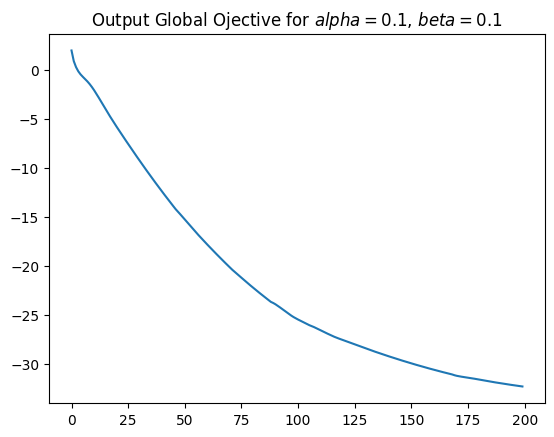

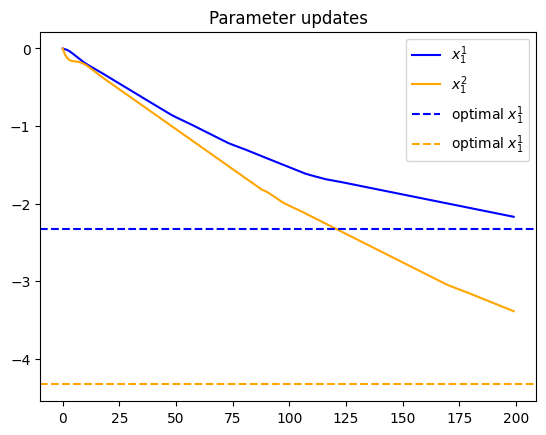

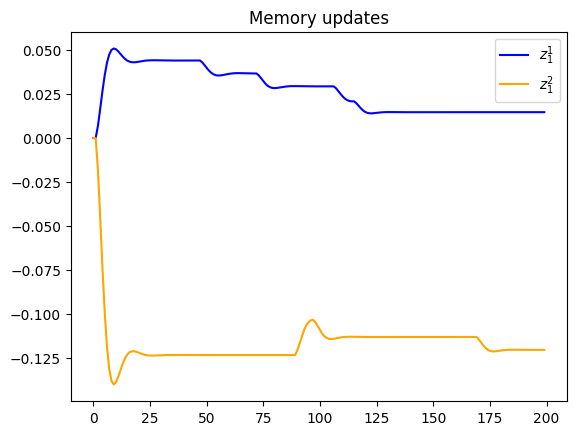

agent 1, parameter 1 converged on: [-2.17142857]
agent 1, parameter 2 converged on: [-4.20714286]


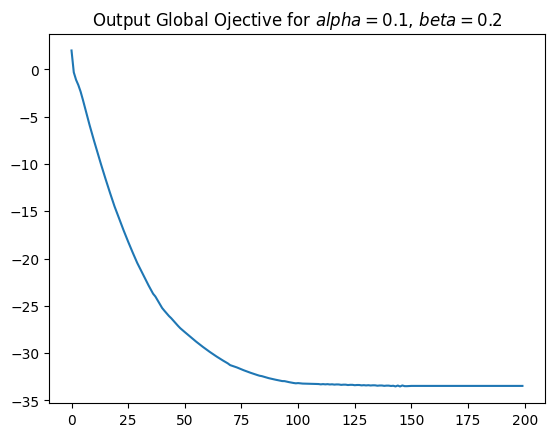

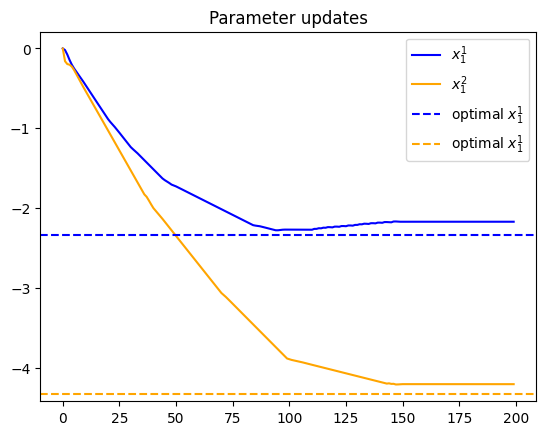

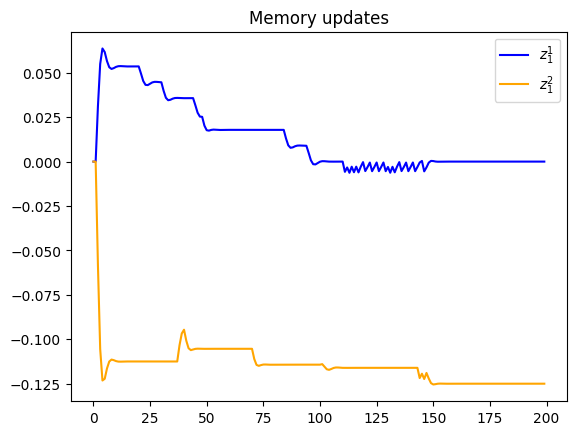

agent 1, parameter 1 converged on: [-2.14653245]
agent 1, parameter 2 converged on: [-4.29411765]


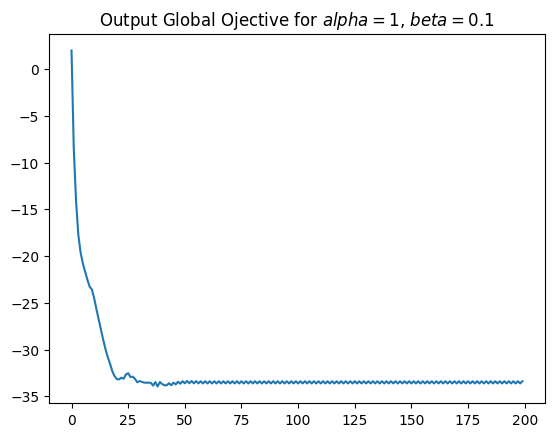

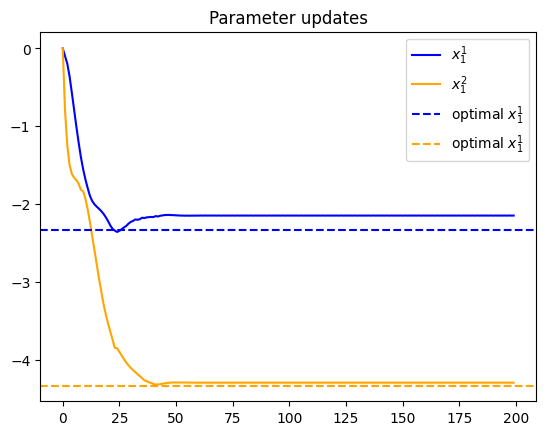

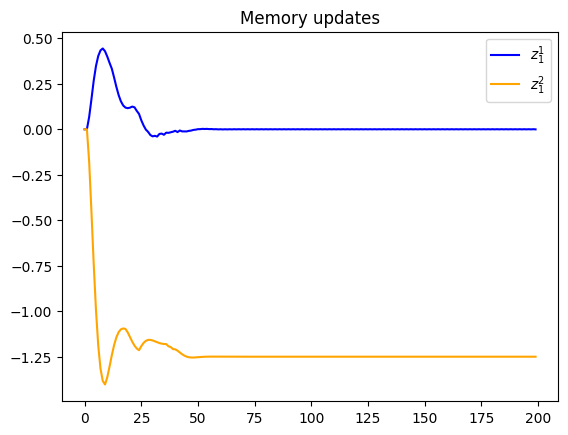

agent 1, parameter 1 converged on: [-2.14575947]
agent 1, parameter 2 converged on: [-4.28571429]


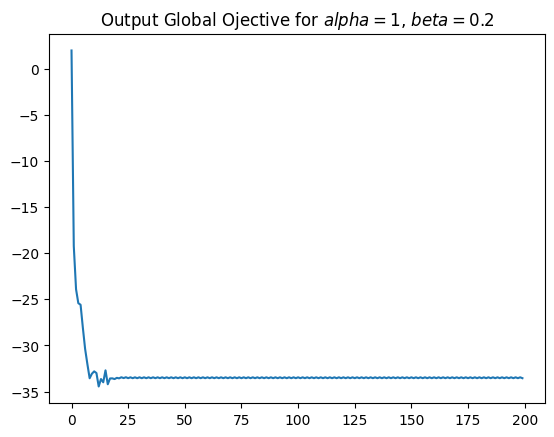

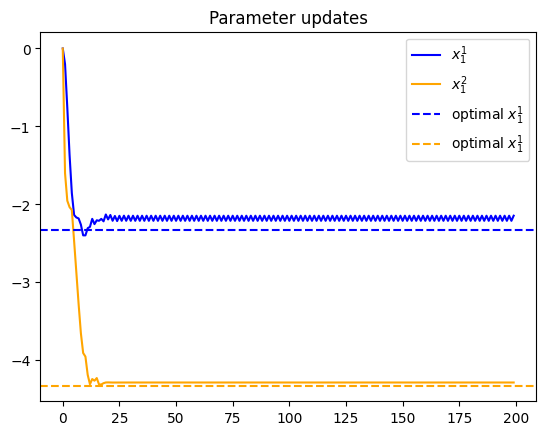

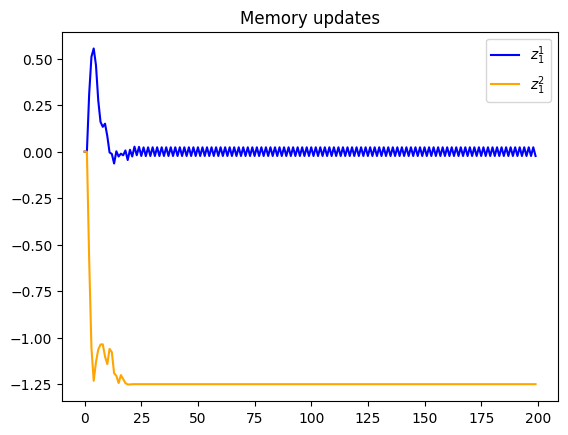

agent 1, parameter 1 converged on: [-2.11606795]
agent 1, parameter 2 converged on: [-4.41176471]


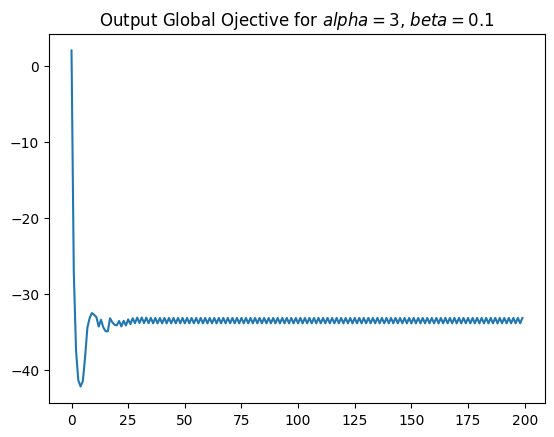

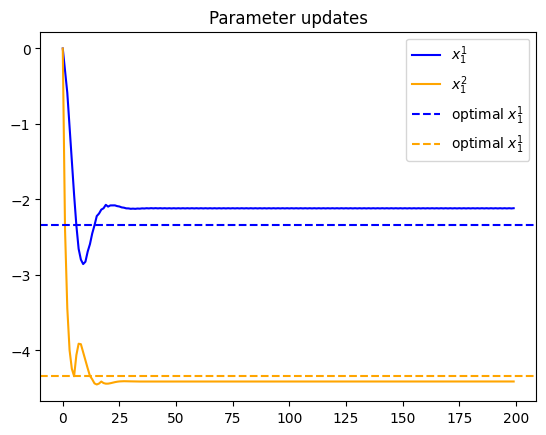

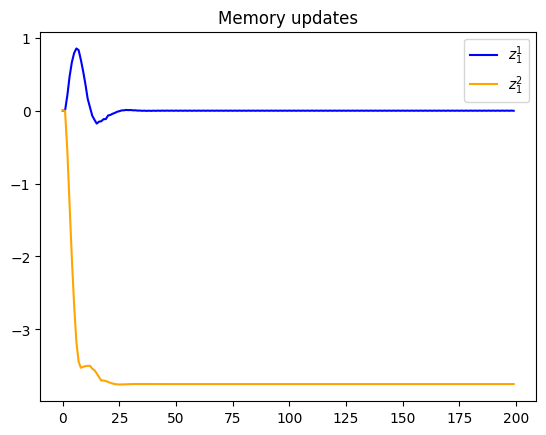

agent 1, parameter 1 converged on: [-2.17810606]
agent 1, parameter 2 converged on: [-4.5]


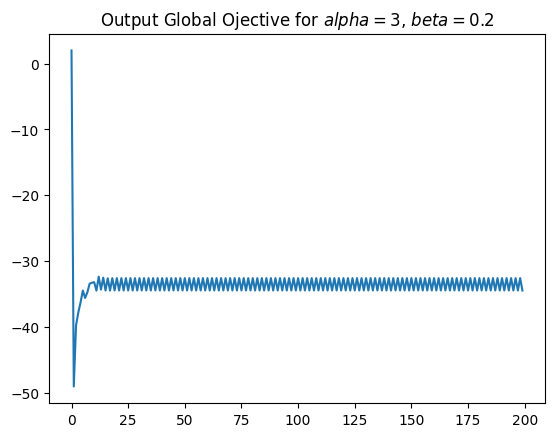

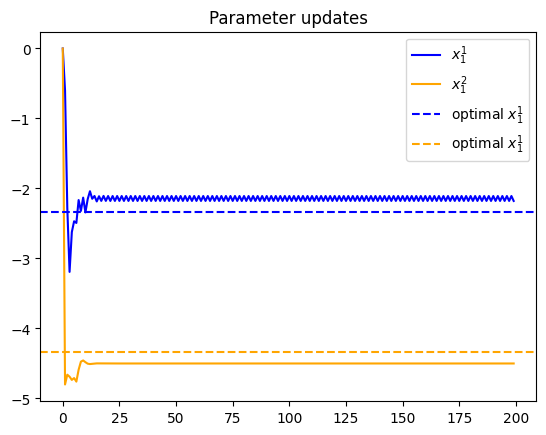

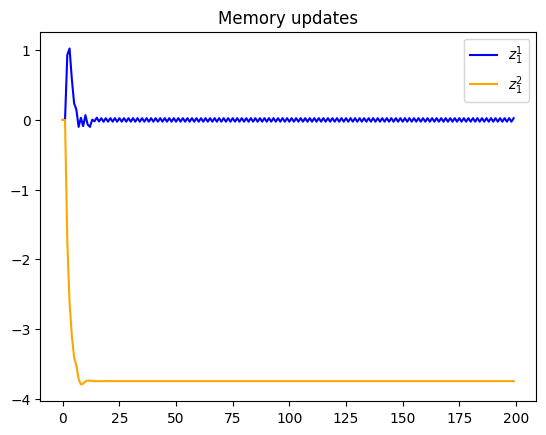

In [13]:
import copy
from matplotlib import pyplot as plt

# Optimiziation process

alphas = [0.1, 1, 3]
betas = [0.1, 0.2]

for alpha in alphas:    # performs bestg for beta = 0.1, 0.2, for 0.5 blows up
    for beta in betas:

        x = [x1, x2, x3, x4]
        z = [z1, z2, z3, z4]

        fs_private = [f1, f2, f3, f4]

        n_iterations = 200

        history_f_global = []
        history_agent1_parameter1 = []
        history_agent1_parameter2 = []

        history_agent1_memory1 = []
        history_agent1_memory2 = []


        for _ in range(n_iterations):

            history_f_global.append(f_global(x, fs_private))
            history_agent1_parameter1.append(x[0][0])
            history_agent1_parameter2.append(x[0][1])
            history_agent1_memory1.append(z[0][0])
            history_agent1_memory2.append(z[0][1])

            x, z = step(x, z, fs_private, alpha= alpha, beta= beta)

        print("agent 1, parameter 1 converged on:", history_agent1_parameter1[-1])
        print("agent 1, parameter 2 converged on:", history_agent1_parameter2[-1])

        plt.plot(range(len(history_f_global)), history_f_global)
        plt.title(f"Output Global Ojective for $alpha={alpha}$, $beta={beta}$")
        plt.show()


        plt.title("Parameter updates")
        plt.plot(range(len(history_agent1_parameter1)), history_agent1_parameter1, label= "$x_1^1$", color= "blue" )
        plt.plot(range(len(history_agent1_parameter2)), history_agent1_parameter2, label= "$x_1^2$", color= "orange")

        plt.axhline(y= -2.3333, linestyle='dashed', color="blue", label= "optimal $x_1^1$")
        plt.axhline(y= -4.3333, linestyle='dashed', color="orange", label= "optimal $x_1^2$")


        plt.legend()

        plt.show()


        plt.title("Memory updates")
        plt.plot(range(len(history_agent1_memory1)), history_agent1_memory1, label= "$z_1^1$", color= "blue"  )
        plt.plot(range(len(history_agent1_memory2)), history_agent1_memory2, label= "$z_1^2$", color= "orange" )
        plt.legend()
        plt.show()


In [29]:
print(z)

[array([[-0.01510668],
       [-2.25      ]]), array([[0.73786617],
       [1.35      ]]), array([[0.01264485],
       [0.45      ]]), array([[-0.73540434],
       [ 0.45      ]])]


## Assumptions / Opportunities
        
- $\beta$, $\alpha$, $a_{ij}$ = ***fixed*** parameters (arbitrarily) chosen before optimization procedure
    - can we make (some of) them trainable parameters?

- we **must provide the subgradient** in the optimization process 
    ($g_i(t)$ = subgradient of function $f_i$ at point $x_i(k)$)
    - here, I provide it using a numerical approximation.
        - are there better methods of providing the subgradient?
        - when moving to testing on benchmarks, good to use automatic differenciation - `jax.grad()`

##### To remember
- **agent states** MUST be of **type float**